# Baseline Correction Techniques

This example shows common ways to compute and apply baseline correction to pupil traces. Baseline correction is useful when measurements include additive offsets (e.g., due to calibration or recording setup) and you want to express responses relative to a baseline level.

## Setup and requirements

Run the notebook from top to bottom. These examples require `pypipr`, `numpy`, and `matplotlib`. The baseline routines assume the light-stimulus timings are set on the `PupilMeasurement` object so that the code can compute baseline windows relative to the stimulus onset.

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pypipr

## Load a sample measurement

We load a simulated pupil measurement. In this example the maximum pupil size is set to an uncorrected value to mimic raw recordings. The plot below shows the original trace together with the light-stimulus interval. Replace `pypipr.load_simulated_pupil()` with your own loader to apply these steps to real data.

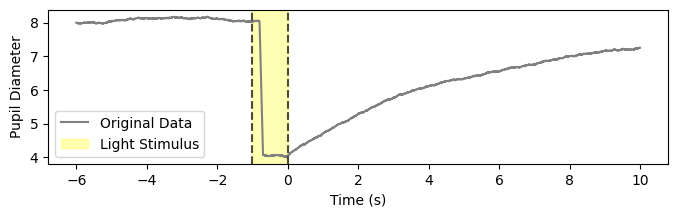

In [ ]:
# Load sample data. We set the max pupil size to 6 mm, to mimic non-baseline corrected data.
pm = pypipr.load_simulated_pupil()

fig, ax = plt.subplots(1, 1, figsize=(8, 2), sharex=True)
pm.plot(ax=ax, label='Original Data', color='gray')
pm.plot_light_stimulus(ax=ax, color='yellow', alpha=0.3)
ax.legend()
plt.show()

## Compute and apply baseline correction

Choose a `baseline_duration` (seconds) which defines how far back from the light onset the baseline window extends. The example below computes the baseline, applies correction to set the baseline to 1.0 (100%), and plots the original and corrected traces for comparison.

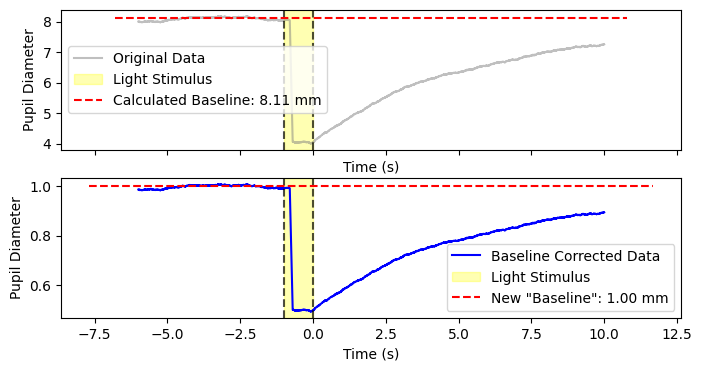

In [ ]:
# Calculate the baseline, and apply the baseline correction. Note. This requires the light stimulus to be set.

baseline_duration = 3 # seconds, counting back from light onset


baseline_pm = pypipr.load_simulated_pupil()
baseline_pm.apply_baseline_correction(baseline_duration)


fig, ax = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
pm.plot(ax=ax[0], label='Original Data', color='gray', alpha=0.5)
baseline_pm.plot(ax=ax[1], label='Baseline Corrected Data', color='blue')
pm.plot_light_stimulus(ax=ax[0], color='yellow', alpha=0.3)
baseline_pm.plot_light_stimulus(ax=ax[1], color='yellow', alpha=0.3)

baseline = pm.calculate_baseline(duration=baseline_duration)
ax[0].hlines(
    baseline,
    ax[0].get_xlim()[0],
    ax[0].get_xlim()[1],
    color="red",
    linestyle="--",
    label=f"Calculated Baseline: {baseline:.2f} mm",
)

# The new baseline should be at exactly 1.00 (100%)
new_baseline = baseline_pm.calculate_baseline(duration=baseline_duration)
ax[1].hlines(
    new_baseline,
    ax[0].get_xlim()[0],
    ax[0].get_xlim()[1],
    color="red",
    linestyle="--",
    label=f'New "Baseline": {new_baseline:.2f} mm',
)


ax[0].legend()
ax[1].legend()
plt.show()